## **Clustering**

* Clustering is an unsupervised machine learning technique designed to group unlabeled examples based on their similarity to each other.

* Applications
    * Market segmentation
    * Social network analysis
    * Search result grouping
    * Medical imaging
    * Image segmentation
    * Anomaly detection

<center>
    <img src="../assets/clustering.png" width=600/>
</center>

### **Clustering Algorithms**

1. Centroid-based clustering
    * K-Means Clustering
2. Density-based clustering
    * DBSCAN

3. Distribution-based clustering
    * Gaussian Mixture Model

4. Hierarchical clustering
    * Agglomerative Hierarchy clustering 

### **1. K-Means Clustering**

* K-means clustering is a popular centroid based clustering method in unsupervised learning that divides a dataset into $K$ clusters. 

* The goal is to minimize the within-cluster variance, often referred to as the sum of squared errors (SSE).

**Algorithm**

1. **Choose the number of clusters $K$**.

2. **Randomly initialize $K$ cluster centroids**
   * ${\mu_1, \mu_2, \mu_3, ..., \mu_K}$
   
3. **Cluster Assignment**
   * Assign cluster to each data point based on proximity using the Euclidean distance formula
   
   * For i=1 to m:
   
      * $c^{(i)}$ := index from (1 to K) of cluster centroid closed to $x^{(i)}$
      
4. **Centroid Movement**
   * Update the centroid of clusters

   * For k=1 to K:
   
      * $\mu_k$ := mean of points assigned to cluster k
      
5. **Repeat steps 3 and 4** until the centroids no longer change or the changes are below a predefined threshold.


**K-Means Optimization Objective**
* $c^{(i)}$ = index of cluster (1,2,3,...,K) to which data point $x^{(i)}$ is currently assigned
* $\mu_k$= cluster centroid k
* $\mu_c^{(i)}$ = cluster centroid of cluster to which data point $x^{(i)}$ has been assigned
* Optimization Objective:

    $min$ $J(c, \mu)$ = $\frac{1}{m} {\sum_{i=1}^{m}(x^{(i)} - \mu_c^{(i)})^2}$

This is called distortion function or sum of squared error.

**K-Means Implementation**

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

In [3]:
# Generate dummy dataset for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Visualize the dataset

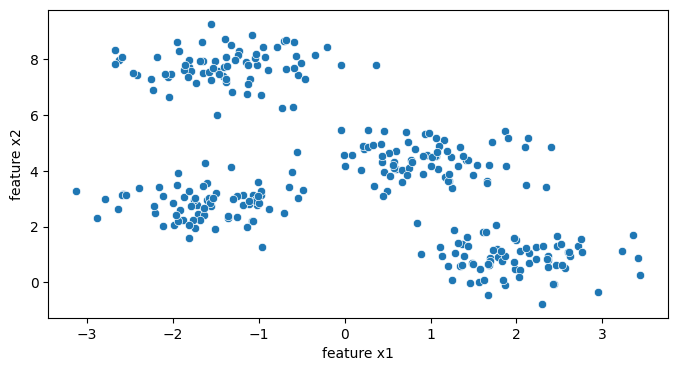

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()

In [8]:
# Apply K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

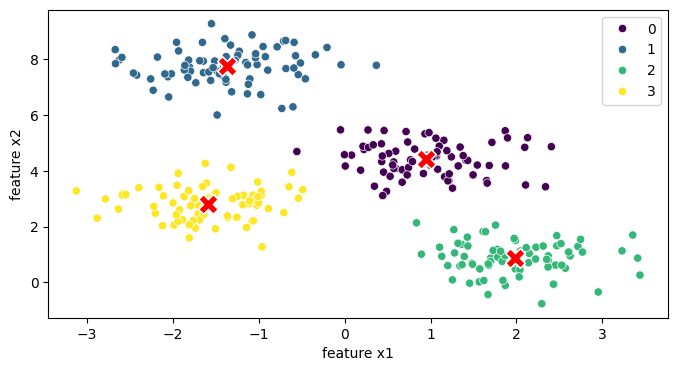

In [14]:
# Plot results
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, c='red', marker='X')
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()

**Chossing the value of $K$ using Elbow Method**

* The Elbow Method is a heuristic used in determining the number of clusters in a dataset for K-means clustering. 

* It helps to identify the point where adding more clusters does not significantly improve the model performance, indicating an optimal number of clusters.

**Steps to Apply the Elbow Method**
1. **Run K-means clustering** for a range of $K$ values (e.g., from 1 to 10).

2. **Calculate the Inertia or Sum of Squared Error** for each $K$. 

3. **Plot the Inertia** against the number of clusters $K$.

4. **Identify the "elbow" point** where the inertia starts to diminish less significantly. This point is considered the optimal number of clusters.

**Interpretation**
- The **elbow point** on the plot is the point where the inertia begins to decrease at a slower rate. This indicates that adding more clusters beyond this point doesn't provide a significant gain in modeling the data.
- Before the elbow point, adding clusters results in a substantial decrease in inertia, implying better-defined clusters.

<center>
    <img src="../assets/elbow.png" width=500/>
</center>

* For more complex data, Silhouette Coefficient is used. It is more robust for evaluating clustering quality in complex scenarios.


In [17]:
# Generate dummy dataset for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# List to store inertia values
inertia = []

# Range of k values
k_values = range(1, 11)

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Visualizing Distortion/Inertia/SSE vs. K

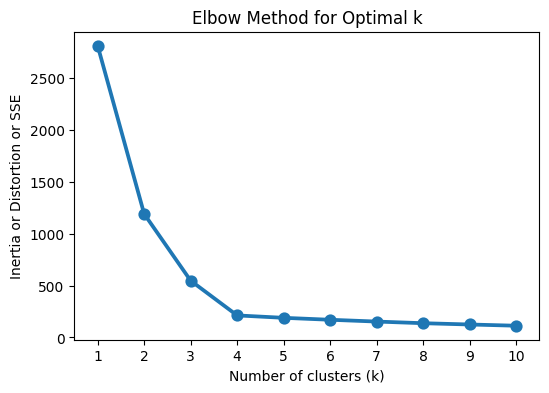

In [21]:
plt.figure(figsize=(6, 4))
sns.pointplot(x=k_values, y=inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia or Distortion or SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

From above plot, we could see that from K=4 on, the distortion valued decreases slowly. So, optimal value for K=4.

**Advantages of K-Means Clustering**
- Simple and easy to implement: The k-means algorithm is easy to understand and implement, making it a popular choice for clustering tasks.

- Fast and efficient: K-means is computationally efficient and can handle large datasets with high dimensionality.

- Scalability: K-means can handle large datasets with a large number of data points and can be easily scaled to handle even larger datasets.

- Flexibility: K-means can be easily adapted to different applications and can be used with different distance metrics and initialization methods.

**Disadvantages of K-Means Clustering**

- Sensitivity to initial centroids: K-means is sensitive to the initial selection of centroids and can converge to a suboptimal solution.

- Requires specifying the number of clusters: The number of clusters k needs to be specified before running the algorithm, which can be challenging in some applications.

- Sensitive to outliers: K-means is sensitive to outliers, which can have a significant impact on the resulting clusters.

- It assumed that the clusters were spherical and equally sized, which is not valid in most real-world scenarios.

- It's a hard clustering method. Meaning each data point is assigned to a single cluster.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

**K-Means Clustering in Non-Spherical Data**

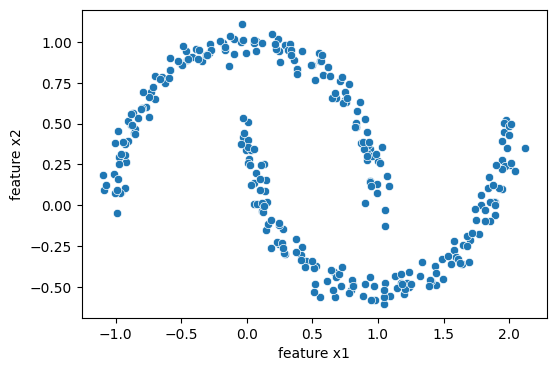

In [41]:
# Generate non-spherical datasets
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Visualize the non-spherical dataset
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1])
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()


In [50]:
# Apply K-means clustering
kmeans_moons = KMeans(n_clusters=2, random_state=0).fit(X_moons)
labels_moons = kmeans_moons.labels_
centroids_moons = kmeans_moons.cluster_centers_


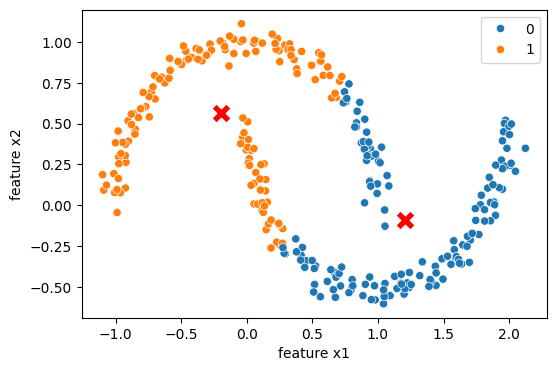

In [54]:
# Visualize the non-spherical dataset with K-means clustering results
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=labels_moons)
sns.scatterplot(x=centroids_moons[:, 0], y=centroids_moons[:, 1], s=200, c='red', marker='X')
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()

Here we could see that, it is not able to clusterify the data points correctly.

### **2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

* The algorithm finds the places that are dense with data points and calls those clusters.

* Unlike K-means, DBSCAN does not require the number of clusters to be specified in advance

* DBSACAN can discover clusters of arbitrary shapes.

* DBSCAN uses two parameters to determine how clusters are defined: 
    * minPts: the minimum number of data points that need to be clustered together for an area to be considered high-density
    
    * eps: the distance used to determine if a data point is in the same area as other data points
<center>
    <img src="../assets/dbscan.png" width=500/>
</center>

**Algorithm Steps**
1. **Select a point:** Arbitrarily select a point p in the dataset.

2. **Neighbor search:** Retrieve all points within eps (ε) distance from p.

3. **Core point check:** If the number of neighbors is greater than or equal to MinPts, p is a core point and a new cluster is created. Otherwise, p is marked as noise (this 
point may later be found to be a border point).

4. **Expand cluster:** If p is a core point, recursively find all density-reachable points from p and add them to the cluster.

5. **Repeat:** Repeat the process until all points are processed.

**Advantages**
* No Need to Specify K: DBSCAN does not require the number of clusters to be specified in advance.

* Ability to Find Arbitrarily Shaped Clusters: DBSCAN can find clusters of arbitrary shapes and sizes.

* Outlier Detection: DBSCAN can naturally identify outliers as points that do not belong to any cluster.

**Disadvantages**
* Parameter Sensitivity: The quality of DBSCAN results depends on the choice of ε and MinPts.

* Difficulty with Varying Densities: DBSCAN may struggle with datasets containing clusters of varying densities.

* High-Dimensional Data: DBSCAN can be less effective in high-dimensional spaces due to the curse of dimensionality.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import seaborn as sns

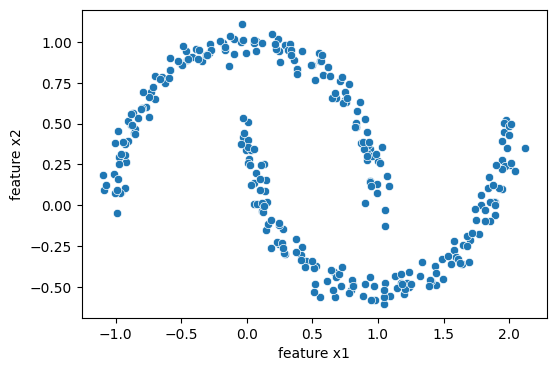

In [4]:
# Generate synthetic dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Visualize the dataset
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.show()

In [5]:
# Apply DBSCAN
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

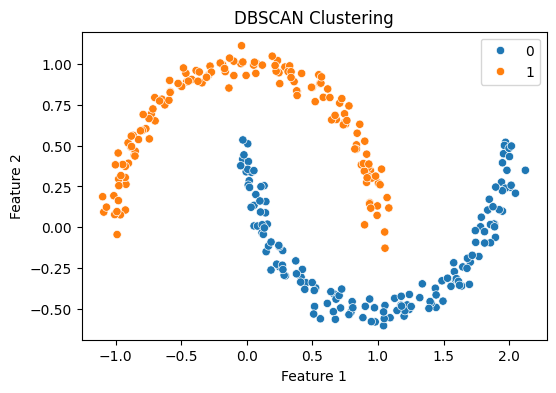

In [7]:
# Visualize the results
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### **3. Gaussian Mixture Model(GMM) Algorithm**

* GMM can be referred as probabilistic KMeans because the starting point and training process of the KMeans and GMM are the same but KMeans uses a distance-based approach, and GMM uses a probabilistic approach.

* Assumption in GMM: the dataset consists of multiple Gaussians i.e a mixture of the gaussian.
<center>
    <img src="../assets/gmm.png"/ width=400>
    <img src="../assets/gmm-cluster.png" width=400/>
</center>



**Algorithm Steps**
1. Decide the number of clusters for the given dataset.

2. Initiate mean, covariance, and weight parameter per cluster.

3. Use the Expectation Maximization algorithm to do the following:

    * Expectation Step (E step): Calculate the probability of each data point belonging to each distribution, then evaluate the likelihood function using the current estimate for the parameters
    * Maximization step (M step): Update the previous mean, covariance, and weight parameters to maximize the expected likelihood found in the E step
    
4. Repeat these steps until the model converges (i.e., changes in the parameters are below a threshold).

**Advantages**
* Flexibility: GMM can model clusters with different shapes and sizes due to the covariance matrix.
* Soft Clustering: Each point can belong to multiple clusters with different probabilities, providing a soft clustering approach.
* Probabilistic Foundation: GMM is based on a solid probabilistic framework.

**Disadvantages**
* Initialization Sensitivity: GMM is sensitive to the initial parameter values and may converge to local optima.
* Computational Complexity: The EM algorithm can be computationally expensive for large datasets.
* Requires Correct Number of Components: Determining the correct number of Gaussian components (K) can be challenging.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [19]:
# Generate synthetic dataset with two Gaussian components

# Set the mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, 0.7], [0.7, 1]]
cov2 = [[0.5, 0.4], [0.4, 0.5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

# Combine the datasets
X = np.vstack((data1, data2))

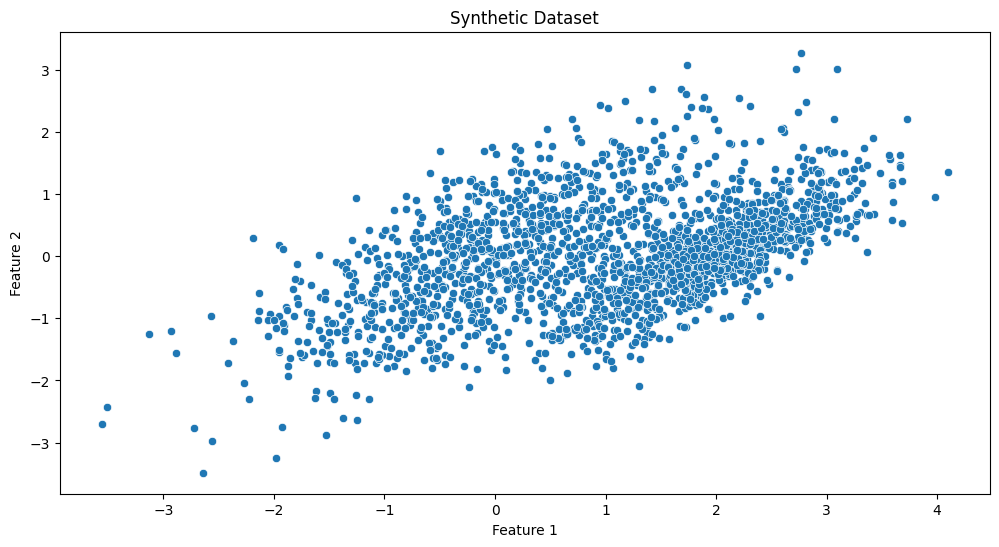

In [20]:
# Visualize the dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)


Text(0, 0.5, 'Feature 2')

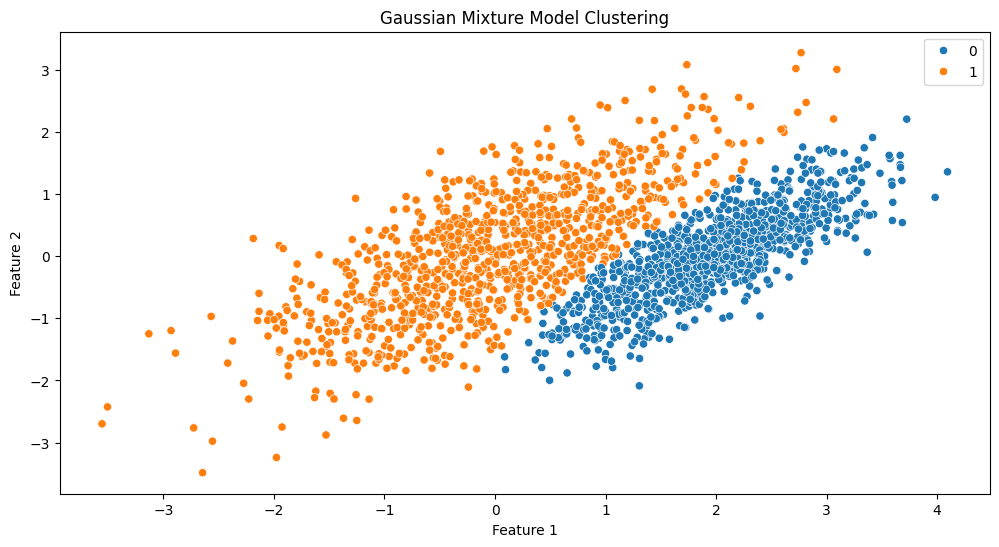

In [22]:
# Visualize the clusters

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### **Hierarchical Based Clustering**
* Hierarchical-based clustering is typically used on hierarchical data. 

* It builds a tree of clusters so everything is organized from the top-down.

* A dendrogram, a tree-like figure produced by hierarchical clustering, depicts the hierarchical relationships between groups. 

* Individual data points are located at the bottom of the dendrogram, while the largest clusters, which include all the data points, are located at the top. 

* In order to generate different numbers of clusters, the dendrogram can be sliced at various heights.

* Below is the implementation of Agglomerative Hierarchical Clustering.

**Agglomerative Hierarchical Clustering**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs


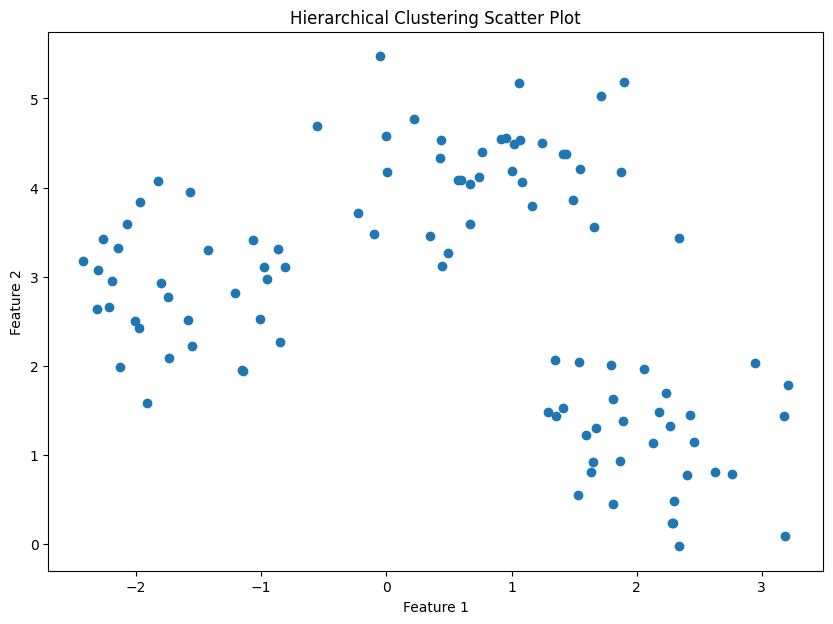

In [26]:
# Generate synthetic dataset
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

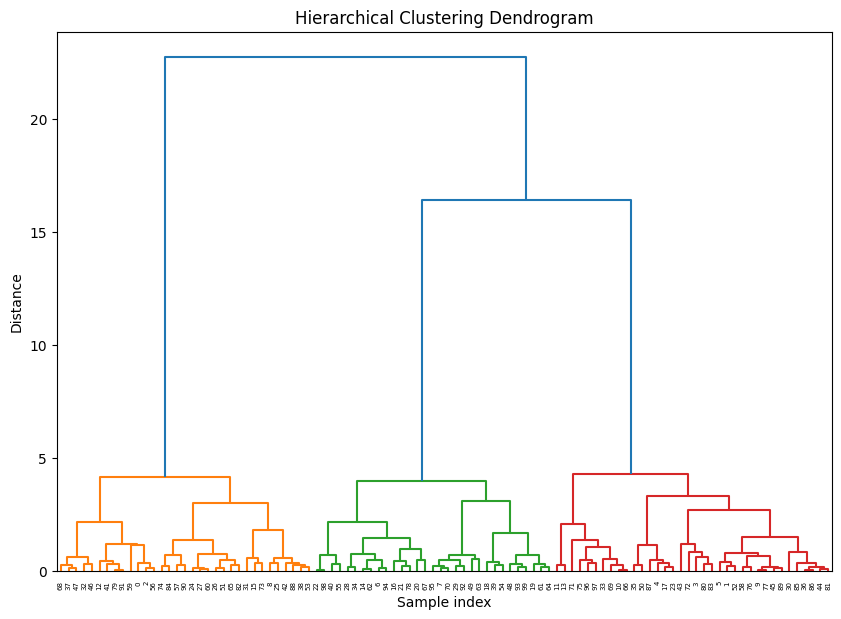

In [27]:
# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

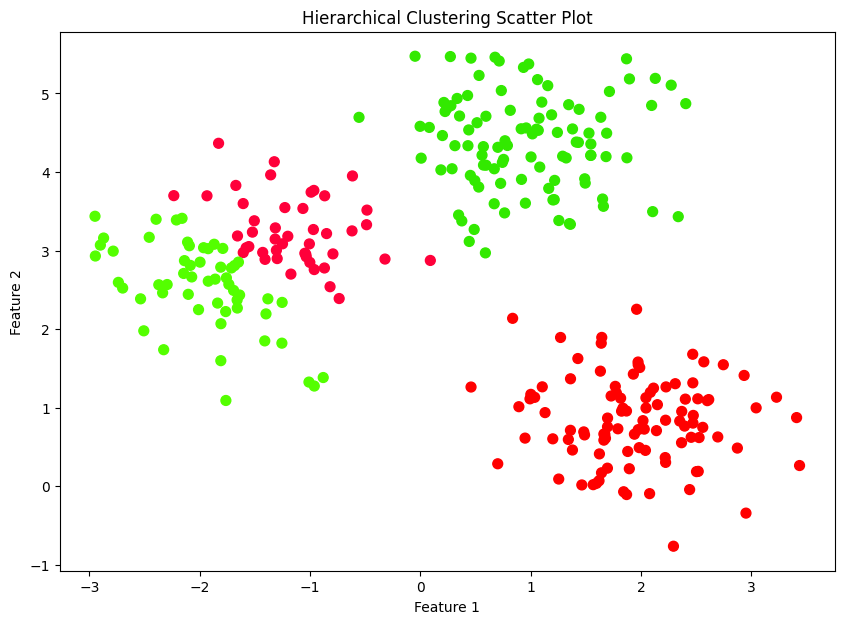

In [28]:
from scipy.cluster.hierarchy import fcluster

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
Z = linkage(X, 'ward')

# Determine cluster labels based on a distance threshold
max_d = 7.0
clusters = fcluster(Z, max_d, criterion='distance')

# Plot the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism', s=50)
plt.title('Hierarchical Clustering Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
